# 회귀(Regression)

지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - mean_absolute_error() 
    - 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    
- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - r2_score()
    - 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    



# Guide
- 결정계수. 바이오에선 90%, 공학에선 70%, 사회과학에선 13% 정도가 기준이 된다고 한다.

In [21]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [23]:
X, y = make_regression(n_samples=100, # 샘플(행)수
                       n_features=1, # feature(컬럼)수 
                       n_informative=1, # target을 만드는데 영향을 주는 feature의 개수.  feature에 영향을 주는 컬럼수
                       noise = 50,   # 잡음
                       coef = False, #Feature간 상관성 여부
                       random_state = 1)

In [24]:
X.shape, y.shape

((100, 1), (100,))

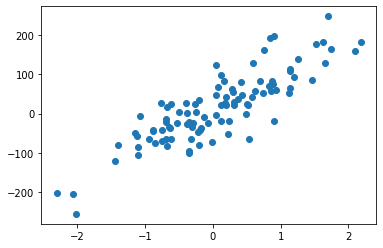

In [25]:
plt.scatter(X, y)

In [26]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(15.293427290684107,
 -255.11169199137663,
 247.19463389209255,
 20.62597485010551)

In [27]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [28]:
# 예측
pred = lr.predict(X)
# np.mean(pred)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
# 평가
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse))
print('R^2 : ', r2)

MSE :  2078.5472792307764
RMSE :  45.59108771712709
R^2 :  0.7321024057172182


In [30]:
score = cross_val_score(lr, X, y, cv=5)#, scoring='r2') #R2
score, np.mean(score)

(array([0.58124097, 0.82853824, 0.52826294, 0.76611492, 0.7184243 ]),
 0.6845162761863837)

In [31]:
# mse 
cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=10) * -1  
#작을 수록 좋은 것인데 양수로 하면 작은게 밑이고 큰게 위이니까 음수로 해서 나오게 함

array([1882.70290581, 2859.09589717,  420.87862081, 3244.99975507,
       1404.5936989 , 2794.10631553, 1863.97405357, 1262.61248332,
       3714.70549983, 2626.12950655])

In [32]:
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([85.14546889]), 10.135071944054275)

In [33]:
X.shape, y.shape

((100, 1), (100,))

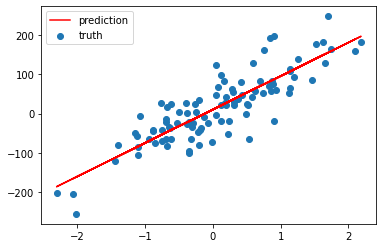

In [34]:
plt.scatter(X, y, label='truth')
y_hat = X*lr.coef_ + lr.intercept_
plt.plot(X, y_hat, color='red', label='prediction')
plt.legend()
plt.show()

In [35]:
lr.predict([[0],[1]])

array([10.13507194, 95.28054083])

## 기존 분류 모델의 회귀 모델

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [37]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=5)
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=2)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('tree',tree_reg), ('random forest',rf_reg), ('linear reg',lr_reg)]

In [38]:
def print_metrics(y, y_pred, title=None):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse}, R2:{r2}")

In [39]:
for name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print_metrics(y_train, pred_train, name+" - Train")
    print_metrics(y_test, pred_test, name+" - Test")
    print("-------------------------------------------")

knn - Train
MSE:1427.767659021123, RMSE:37.785812933178015, R2:0.8019417941941395
knn - Test
MSE:2864.855454376287, RMSE:53.52434450207015, R2:0.6640766473771966
-------------------------------------------
tree - Train
MSE:817.4625116301221, RMSE:28.59130132802846, R2:0.8866025873719422
tree - Test
MSE:3301.0727964279786, RMSE:57.45496320099751, R2:0.6129272632816158
-------------------------------------------
random forest - Train
MSE:1711.3701074962148, RMSE:41.368709280036946, R2:0.7626008049566919
random forest - Test
MSE:2966.6197157562738, RMSE:54.46668445716403, R2:0.6521441110226214
-------------------------------------------
linear reg - Train
MSE:2017.1792010802012, RMSE:44.9130181693482, R2:0.7201793367215267
linear reg - Test
MSE:2368.5811126977082, RMSE:48.6680707723011, R2:0.7222681140435795
-------------------------------------------


In [40]:
# VotingRegressor: 각 모델이 예측한 값의 평균을 반환한다.
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=2)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=2)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('random forest',rf_reg), ('linear reg',lr_reg)]

vote_reg = VotingRegressor(estimators)
vote_reg.fit(X_train, y_train)
pred_train = vote_reg.predict(X_train)
pred_test = vote_reg.predict(X_test)

In [41]:
print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

MSE:1575.4065083382022, RMSE:39.69139085920525, R2:0.781461511272596
MSE:2445.99255516024, RMSE:49.45697680975092, R2:0.7131911076474426


In [42]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [43]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [46]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(tree_reg, 
                               out_file=None,
                               rounded=True, filled=True))
# display(SVG(graph.pipe(format='svg')))
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [25]:
#위 그림에서 value 는 sample값들의 평균

np.mean(y_train[np.where(X_train<=0.015)[0]])

-46.0226932531074

In [26]:
y_train.shape

(80,)